In [1]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np


In [7]:


# Try reading the CSV with a different encoding
nobel_prize = pd.read_csv("/kaggle/input/nobel-prize-winners-19002020/nobel_prize_by_winner.csv", encoding='ISO-8859-1')

# Check the first few rows and column names
print(nobel_prize.head(), nobel_prize.columns)


    id         firstname  surname        born        died bornCountry  \
0  846            Elinor   Ostrom    8/7/1933   6/12/2012         USA   
1  846            Elinor   Ostrom    8/7/1933   6/12/2012         USA   
2  783      Wangari Muta  Maathai    4/1/1940   9/25/2011       Kenya   
3  230  Dorothy Crowfoot  Hodgkin   5/12/1910   7/29/1994       Egypt   
4  918            Youyou       Tu  12/30/1930  0000-00-00       China   

  bornCountryCode         bornCity     diedCountry diedCountryCode  \
0              US  Los Angeles, CA             USA              US   
1              US  Los Angeles, CA             USA              US   
2              KE            Nyeri           Kenya              KE   
3              EG            Cairo  United Kingdom              GB   
4              CN  Zhejiang Ningbo             NaN             NaN   

            diedCity  gender    year   category overallMotivation  share  \
0    Bloomington, IN  female  2009.0  economics               Na

Analyze Nobel Prize winner data and identify patterns by answering the following questions:

What is the most commonly awarded gender and birth country?

Store your answers as string variables top_gender and top_country.
Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

Store this as an integer called max_decade_usa.
Which decade and Nobel Prize category combination had the highest proportion of female laureates?

Store this as a dictionary called max_female_dict where the decade is the key and the category is the value. There should only be one key:value pair.
Who was the first woman to receive a Nobel Prize, and in what category?

Save your string answers as first_woman_name and first_woman_category.
Which individuals or organizations have won more than one Nobel Prize throughout the years?

Store the full names in a list named repeat_list.

# Load the dataset and find the most common gender and birth country Load the dataset into a DataFrame using pandas and then extract the top values from sex and birth_country.

In [10]:
# Replace 'column_name' with the actual column name you're interested in
top_gender = nobel_prize['gender'].value_counts().index[0]
print(f"The most common value in the column is: {top_gender}")

The most common value in the column is: male


In [13]:
# most_country = nobel_prize["birth_country"].mode()[0]
top_country = nobel_prize["bornCountry"].value_counts().index[0]
print(top_country)

USA



# Identify the decade with the highest ratio of US-born winners

**Identify the decade with the highest ratio of US-born winners To calculate the ratio, first create a column that creates a flag for winners whose birth country is "United States of America", then create a decade column, and use both to find the ratio.**

In [14]:
# Step 1: Create a flag for US-born winners
nobel_prize['is_usa_born'] = nobel_prize['bornCountry'] == 'USA'

#create a decade column
nobel_prize["decade"] =  (nobel_prize["year"] // 10) *10

print(nobel_prize)

      id                                          firstname  surname  \
0    846                                             Elinor   Ostrom   
1    846                                             Elinor   Ostrom   
2    783                                       Wangari Muta  Maathai   
3    230                                   Dorothy Crowfoot  Hodgkin   
4    918                                             Youyou       Tu   
..   ...                                                ...      ...   
967  525            United Nations Children's Fund (UNICEF)      NaN   
968  527         International Labour Organization (I.L.O.)      NaN   
969  537                              Amnesty International      NaN   
970  547  International Physicians for the Prevention of...      NaN   
971  550                 United Nations Peacekeeping Forces      NaN   

           born        died bornCountry bornCountryCode         bornCity  \
0      8/7/1933   6/12/2012         USA              US  Lo

* Use groupby() to group by decade, then use .mean() on the US-born winner column. By setting as_index=False, you make sure the result is saved as a DataFrame rather than a series.
*  Group by decade and calculate the ratio

In [15]:
#  Calculate the ratio of US-born winners per decade 
decade_ratio = nobel_prize.groupby("decade", as_index=False)["is_usa_born"].mean()
print(decade_ratio)

    decade  is_usa_born
0   1900.0     0.017241
1   1910.0     0.075000
2   1920.0     0.074074
3   1930.0     0.241935
4   1940.0     0.288889
5   1950.0     0.278481
6   1960.0     0.262500
7   1970.0     0.308411
8   1980.0     0.313131
9   1990.0     0.392523
10  2000.0     0.414286
11  2010.0     0.336842


In [16]:
# Identify the decade with the highest ratio of US-born winners

max_decade_usa= decade_ratio[decade_ratio['is_usa_born'] == decade_ratio['is_usa_born'].max()]['decade'].values[0]
print(max_decade_usa)

2000.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


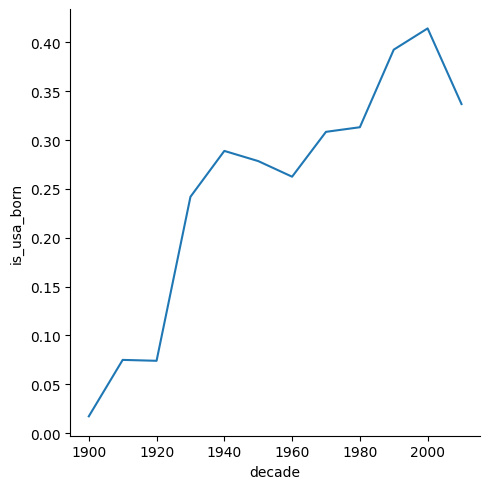

In [17]:
sns.relplot(x ="decade", y ="is_usa_born", kind = "line", data = decade_ratio)

#  Find the decade and category with the highest proportion of female laureates

* You can copy and modify your code from the previous tasks to create a DataFrame for the proportion of female winners, then create a dictionary called max_female_dict with the year and category pair with the most female winners.

In [26]:
nobel_prize["female_winner"] = nobel_prize["gender"] == "female"
print(nobel_prize)

      id                                          firstname  surname  \
0    846                                             Elinor   Ostrom   
1    846                                             Elinor   Ostrom   
2    783                                       Wangari Muta  Maathai   
3    230                                   Dorothy Crowfoot  Hodgkin   
4    918                                             Youyou       Tu   
..   ...                                                ...      ...   
967  525            United Nations Children's Fund (UNICEF)      NaN   
968  527         International Labour Organization (I.L.O.)      NaN   
969  537                              Amnesty International      NaN   
970  547  International Physicians for the Prevention of...      NaN   
971  550                 United Nations Peacekeeping Forces      NaN   

           born        died bornCountry bornCountryCode         bornCity  \
0      8/7/1933   6/12/2012         USA              US  Lo

* Group by two columns
*  Use groupby() to group by both decade and category, then isolate the female_winner column and take the mean(). Use as_index=False to save the result as a DataFrame.


In [25]:
print(nobel_prize["gender"].unique())


['female' 'male' 'org']


In [27]:
grouped_fem_win = nobel_prize.groupby(["decade", "category"], as_index=False)["female_winner"].mean()

print(grouped_fem_win)

    decade    category  female_winner
0   1900.0   chemistry       0.000000
1   1900.0  literature       0.100000
2   1900.0    medicine       0.000000
3   1900.0       peace       0.071429
4   1900.0     physics       0.076923
..     ...         ...            ...
61  2010.0   economics       0.000000
62  2010.0  literature       0.333333
63  2010.0    medicine       0.100000
64  2010.0       peace       0.400000
65  2010.0     physics       0.000000

[66 rows x 3 columns]


* Find the decade and category with the highest female winners
* Using the new DataFrame with the means of female winners, find the row that has the highest mean by filtering the DataFrame to find the row with the .max() mean value.
* To save the decade and category values, add ['decade', 'category'] to the filter.


In [28]:

max_female_winners = grouped_fem_win[grouped_fem_win['female_winner'] == grouped_fem_win['female_winner'].max()]

# Extract the decade and category values
max_decade_category = max_female_winners[['decade', 'category']].values[0]

# Print the result
print(f"The decade and category with the highest mean of female winners are: {max_decade_category}")




The decade and category with the highest mean of female winners are: [2010.0 'peace']


In [29]:
max_female_dict = {max_decade_category[0]: max_decade_category[1]}

print(max_female_dict)

{2010.0: 'peace'}


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

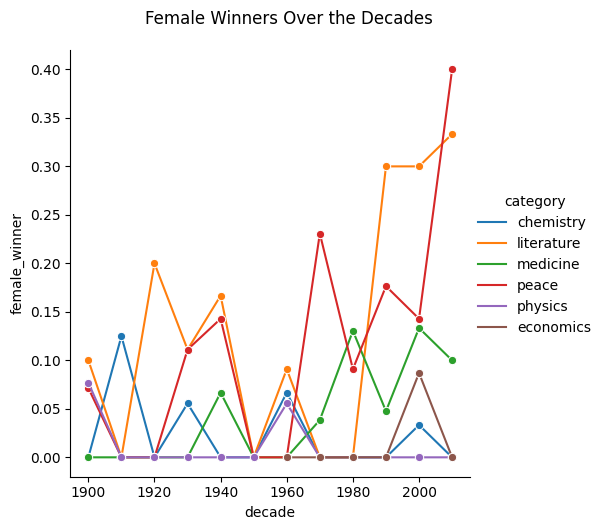

In [30]:
import matplotlib.pyplot as plt

# Create the relplot
g = sns.relplot(
    x="decade", 
    y="female_winner", 
    data=grouped_fem_win, 
    kind="line", 
    hue="category",  # Set hue to category to differentiate lines
    marker='o'  # Optional: adds markers for each data point
)

# Set the title of the plot
g.fig.suptitle("Female Winners Over the Decades", y=1.05)  # Adjust y for title placement

# Show the plot
plt.show()

**Create a dictionary Use the curly braces syntax to create a dictionary and apply .values[0] to extract the decade and category from the values you just saved. It should look something like this: {df['col1'].values[0]: df['col2'].values[0]}**

# Find first woman to win a Nobel Prize

* Filter the DataFrame for the rows with Female winners and find the earliest year and corresponding category in this subset.

In [36]:
nobel_prize["full_name"] = nobel_prize["firstname"] +" " + nobel_prize["surname"]
print(nobel_prize)

      id                                          firstname  surname  \
0    846                                             Elinor   Ostrom   
1    846                                             Elinor   Ostrom   
2    783                                       Wangari Muta  Maathai   
3    230                                   Dorothy Crowfoot  Hodgkin   
4    918                                             Youyou       Tu   
..   ...                                                ...      ...   
967  525            United Nations Children's Fund (UNICEF)      NaN   
968  527         International Labour Organization (I.L.O.)      NaN   
969  537                              Amnesty International      NaN   
970  547  International Physicians for the Prevention of...      NaN   
971  550                 United Nations Peacekeeping Forces      NaN   

           born        died bornCountry bornCountryCode         bornCity  \
0      8/7/1933   6/12/2012         USA              US  Lo


# Determine repeat winners

* Count the number of times each winner has won, then select those with counts of two or more, saving the full names as a list called repeats.

In [37]:
nobel_female = nobel_prize[nobel_prize["female_winner"]] 
# print(noble_female)
min_row = nobel_female[nobel_female["year"] == nobel_female["year"].min()]
first_woman_name = min_row["full_name"].values[0]
first_woman_category = min_row["category"].values[0]

print(f"\n The first woman to win a Nobel Prize was {first_woman_name}, in the category of {first_woman_category}.")


 The first woman to win a Nobel Prize was Marie Curie, n_e Sklodowska, in the category of physics.


In [38]:
winner_counts = nobel_prize["full_name"].value_counts()
print(winner_counts)

full_name
Jack W. Szostak             3
Elinor Ostrom               2
Ilja Mikhailovich Frank    2
Paul Ehrlich                2
Mario R. Capecchi           2
                           ..
The (Theodor) Svedberg      1
Ronald Ross                 1
Lord (Alexander R.) Todd    1
Leopold Ruzicka             1
Albert John Lutuli          1
Name: count, Length: 874, dtype: int64


In [39]:
# Select winners with counts of two or more
repeats = winner_counts[winner_counts >= 2].index
repeat_list = repeats.to_list()
print(repeat_list)

['Jack W. Szostak', 'Elinor Ostrom', 'Il\x82ja Mikhailovich Frank', 'Paul Ehrlich', 'Mario R. Capecchi', 'Richard Kuhn', 'Osamu Shimomura', 'Charles Kuen Kao', 'Serge Haroche', 'David J. Wineland', 'Roger Y. Tsien', 'Igor Yevgenyevich Tamm', 'Carl Bosch', 'Claude Cohen-Tannoudji', 'Albert Fert', 'Werner Forssmann', 'Antonio Caetano de Abreu Freire Egas Moniz', 'Rudolf Ludwig M_ssbauer', 'Adam G. Riess', 'Saul Perlmutter', 'Friedrich Bergius', 'Thomas C. Sôdhof', 'Linus Carl Pauling', 'Ilya Prigogine', 'Kurt Wôthrich', 'Tomas Lindahl', 'Paul Modrich', 'Roderick MacKinnon', 'Robert J. Lefkowitz', 'Thomas A. Steitz', 'Christian de Duve', 'Petrus (Peter) Josephus Wilhelmus Debye', 'Frederick Sanger', 'Stefan W. Hell', 'Walther Bothe', 'Hermann Staudinger', 'Johann Deisenhofer', 'Bruce A. Beutler', 'Adolf Friedrich Johann Butenandt', 'Martin Karplus', 'Randy W. Schekman', 'Fritz Albert Lipmann', 'John Bardeen', 'William Parry Murphy', 'Isamu Akasaki', 'Dale T. Mortensen', 'John L. Hall', 'G